<a href="https://colab.research.google.com/github/adikul25/Notebooks/blob/main/CryptoTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas_datareader --upgrade

In [2]:
pip install yfinance

In [3]:
pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [5]:
cryptolist = ['BTC-USD','ETH-USD','LTC-USD','MATIC-USD']

In [6]:
df = yf.download(tickers=cryptolist, period='3y', interval='1d')['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [7]:
df

Ticker,BTC-USD,ETH-USD,LTC-USD,MATIC-USD
Date,,,,
2021-02-12,47504.851562,1843.532593,197.231705,0.121233
2021-02-13,47105.515625,1814.109863,226.227600,0.111650
2021-02-14,48717.289062,1805.084106,214.430267,0.100922
2021-02-15,47945.058594,1779.791016,207.681015,0.107605
2021-02-16,49199.871094,1781.067505,210.546570,0.108900
...,...,...,...,...
2024-02-07,44318.222656,2423.745117,68.556030,0.833532
2024-02-08,45301.566406,2419.906494,70.562767,0.834391
2024-02-09,47147.199219,2487.515625,70.677048,0.853058


**SENSELESS PLOTTING**

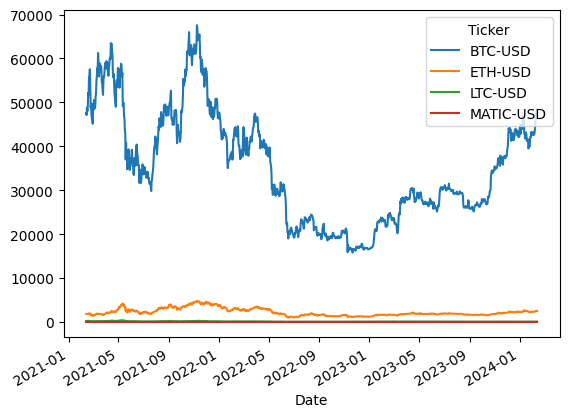

In [8]:
df.plot()
plt.show()

**RELATIVE CHANGES**

To Compare crypto we have to track the returns

In [9]:
daily_returns = df.pct_change().dropna(axis=0)
daily_returns

Ticker,BTC-USD,ETH-USD,LTC-USD,MATIC-USD
Date,,,,
2021-02-13,-0.008406,-0.015960,0.147014,-0.079046
2021-02-14,0.034216,-0.004975,-0.052148,-0.096086
2021-02-15,-0.015851,-0.014012,-0.031475,0.066219
2021-02-16,0.026172,0.000717,0.013798,0.012035
2021-02-17,0.059942,0.037837,0.125516,0.030487
...,...,...,...,...
2024-02-07,0.028631,0.021728,0.003881,0.034441
2024-02-08,0.022188,-0.001584,0.029271,0.001031
2024-02-09,0.040741,0.027939,0.001620,0.022372


In [10]:
daily_cum_returns = (daily_returns + 1).cumprod()
daily_cum_returns

Ticker,BTC-USD,ETH-USD,LTC-USD,MATIC-USD
Date,,,,
2021-02-13,0.991594,0.984040,1.147014,0.920954
2021-02-14,1.025522,0.979144,1.087200,0.832463
2021-02-15,1.009267,0.965424,1.052980,0.887588
2021-02-16,1.035681,0.966117,1.067509,0.898270
2021-02-17,1.097762,1.002672,1.201498,0.925656
...,...,...,...,...
2024-02-07,0.932920,1.314729,0.347591,6.875454
2024-02-08,0.953620,1.312646,0.357766,6.882540
2024-02-09,0.992471,1.349320,0.358345,7.036516


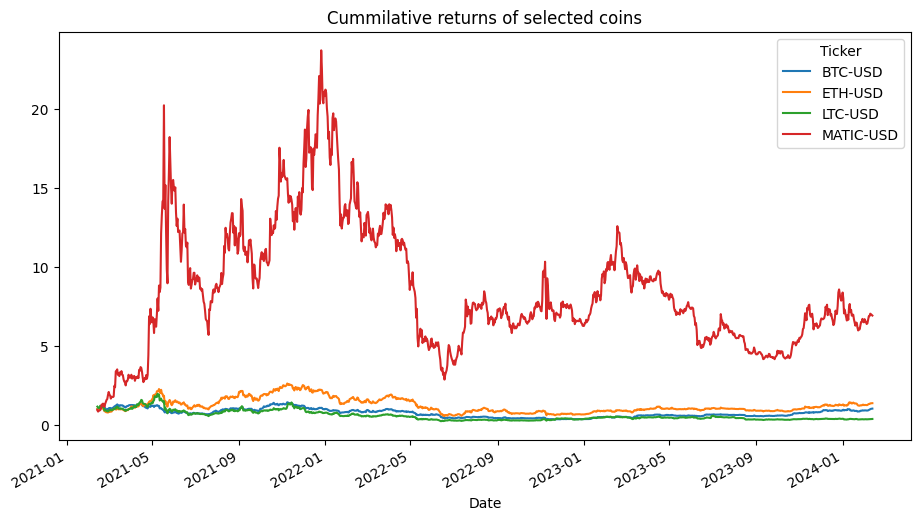

In [11]:
daily_cum_returns.plot(figsize=(11,6))
plt.title('Cummilative returns of selected coins')
plt.show()

Text(0.5, 1.0, 'LTC')

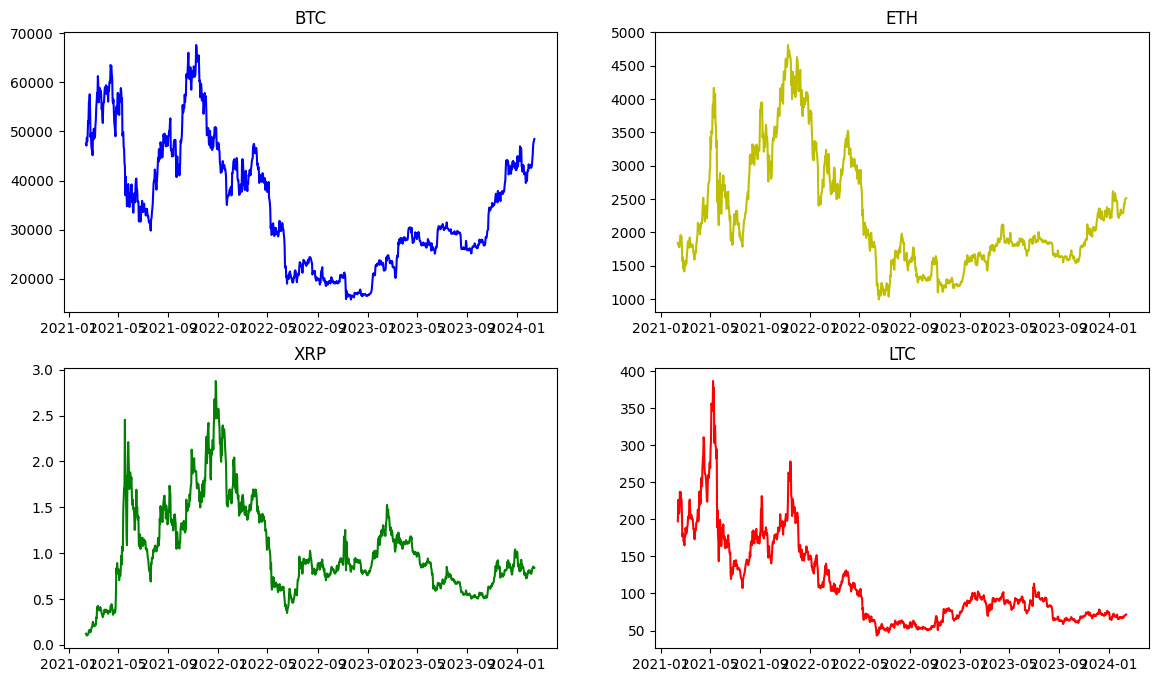

In [15]:
fig,axs = plt.subplots(2,2, figsize=(14,8))
axs[0,0].plot(df['BTC-USD'], color = 'b')
axs[0,0].set_title('BTC')
axs[0,1].plot(df['ETH-USD'], color = 'y')
axs[0,1].set_title('ETH')
axs[1,0].plot(df['MATIC-USD'], color = 'g')
axs[1,0].set_title('XRP')
axs[1,1].plot(df['LTC-USD'], color = 'r')
axs[1,1].set_title('LTC')


Text(0.5, 1.0, 'LTC')

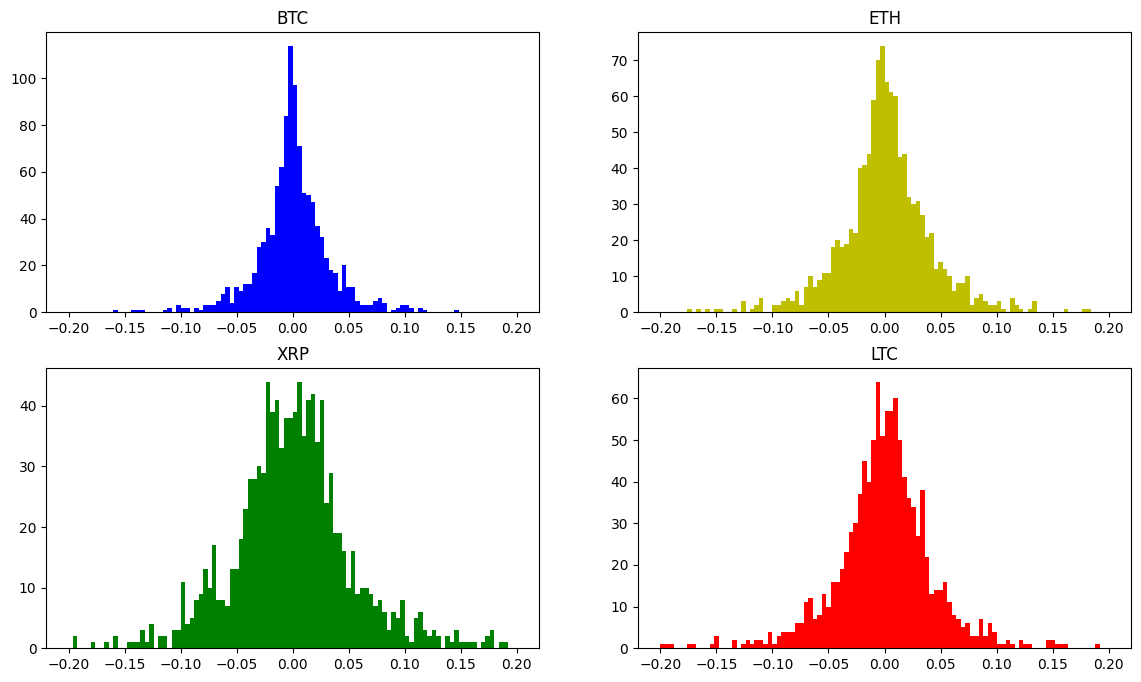

In [18]:
fig,axs = plt.subplots(2,2, figsize=(14,8))
axs[0,0].hist(daily_returns['BTC-USD'], color = 'b', bins = 100, range=(-0.2,0.2))
axs[0,0].set_title('BTC')
axs[0,1].hist(daily_returns['ETH-USD'], color = 'y', bins = 100, range=(-0.2,0.2))
axs[0,1].set_title('ETH')
axs[1,0].hist(daily_returns['MATIC-USD'], color = 'g', bins = 100, range=(-0.2,0.2))
axs[1,0].set_title('XRP')
axs[1,1].hist(daily_returns['LTC-USD'], color = 'r', bins = 100, range=(-0.2,0.2))
axs[1,1].set_title('LTC')

In [19]:
daily_returns.corr()

Ticker,BTC-USD,ETH-USD,LTC-USD,MATIC-USD
Ticker,,,,
BTC-USD,1.000000,0.831667,0.759357,0.616530
ETH-USD,0.831667,1.000000,0.780598,0.693606
LTC-USD,0.759357,0.780598,1.000000,0.624298
MATIC-USD,0.616530,0.693606,0.624298,1.000000


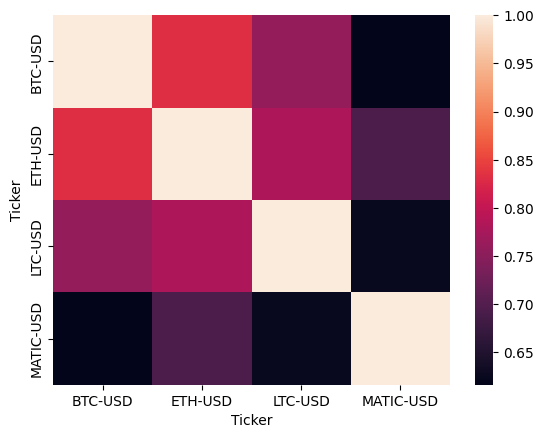

In [20]:
sns.heatmap(daily_returns.corr())
plt.show()